In [1]:
!pip install scikit-learn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\AirbnbBerlin.csv", encoding='latin1')
df.head()

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\177672460.py:2: DtypeWarning: Columns (19,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\AirbnbBerlin.csv", encoding='latin1')


,index,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,0,58660447.0,01/03/2016,14876562.0,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃÂ¶lln,44696672,...,01/03/2016,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f
1,1,NaN,NaN,NaN,NaN,NaN,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,2,58663795.0,01/03/2016,49367757.0,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
3,3,59003619.0,01/05/2016,46694292.0,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
4,4,66845661.0,03-25-16,54542819.0,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  456961 non-null  int64  
 1   Review ID              452805 non-null  float64
 2   review_date            452805 non-null  object 
 3   Reviewer ID            452805 non-null  float64
 4   Reviewer Name          452805 non-null  object 
 5   Comments               452595 non-null  object 
 6   Listing ID             456961 non-null  int64  
 7   Listing URL            456961 non-null  object 
 8   Listing Name           456756 non-null  object 
 9   Host ID                456961 non-null  int64  
 10  Host URL               456961 non-null  object 
 11  Host Name              456913 non-null  object 
 12  Host Since             456913 non-null  object 
 13  Host Response Time     398194 non-null  object 
 14  Host Response Rate     398194 non-nu

In [4]:
def get_column_types(df):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
    return numeric_columns, object_columns , bool_columns

In [5]:
numeric_columns, object_columns , bool_columns = get_column_types(df)
print("# numeric_columns \n")
print(numeric_columns)
print("\n #object_columns \n")
print(object_columns)
print("\n #boolian_columns \n")
print(bool_columns)

# numeric_columns 

['index', 'Review ID', 'Reviewer ID', 'Listing ID', 'Host ID', 'Latitude', 'Longitude', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews', 'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating', 'Communication Rating', 'Location Rating', 'Value Rating']

 #object_columns 

['review_date', 'Reviewer Name', 'Comments', 'Listing URL', 'Listing Name', 'Host URL', 'Host Name', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code', 'Country Code', 'Country', 'Is Exact Location', 'Property Type', 'Room Type', 'Price', 'First Review', 'Last Review', 'Instant Bookable', 'Business Travel Ready']

 #boolian_columns 

[]


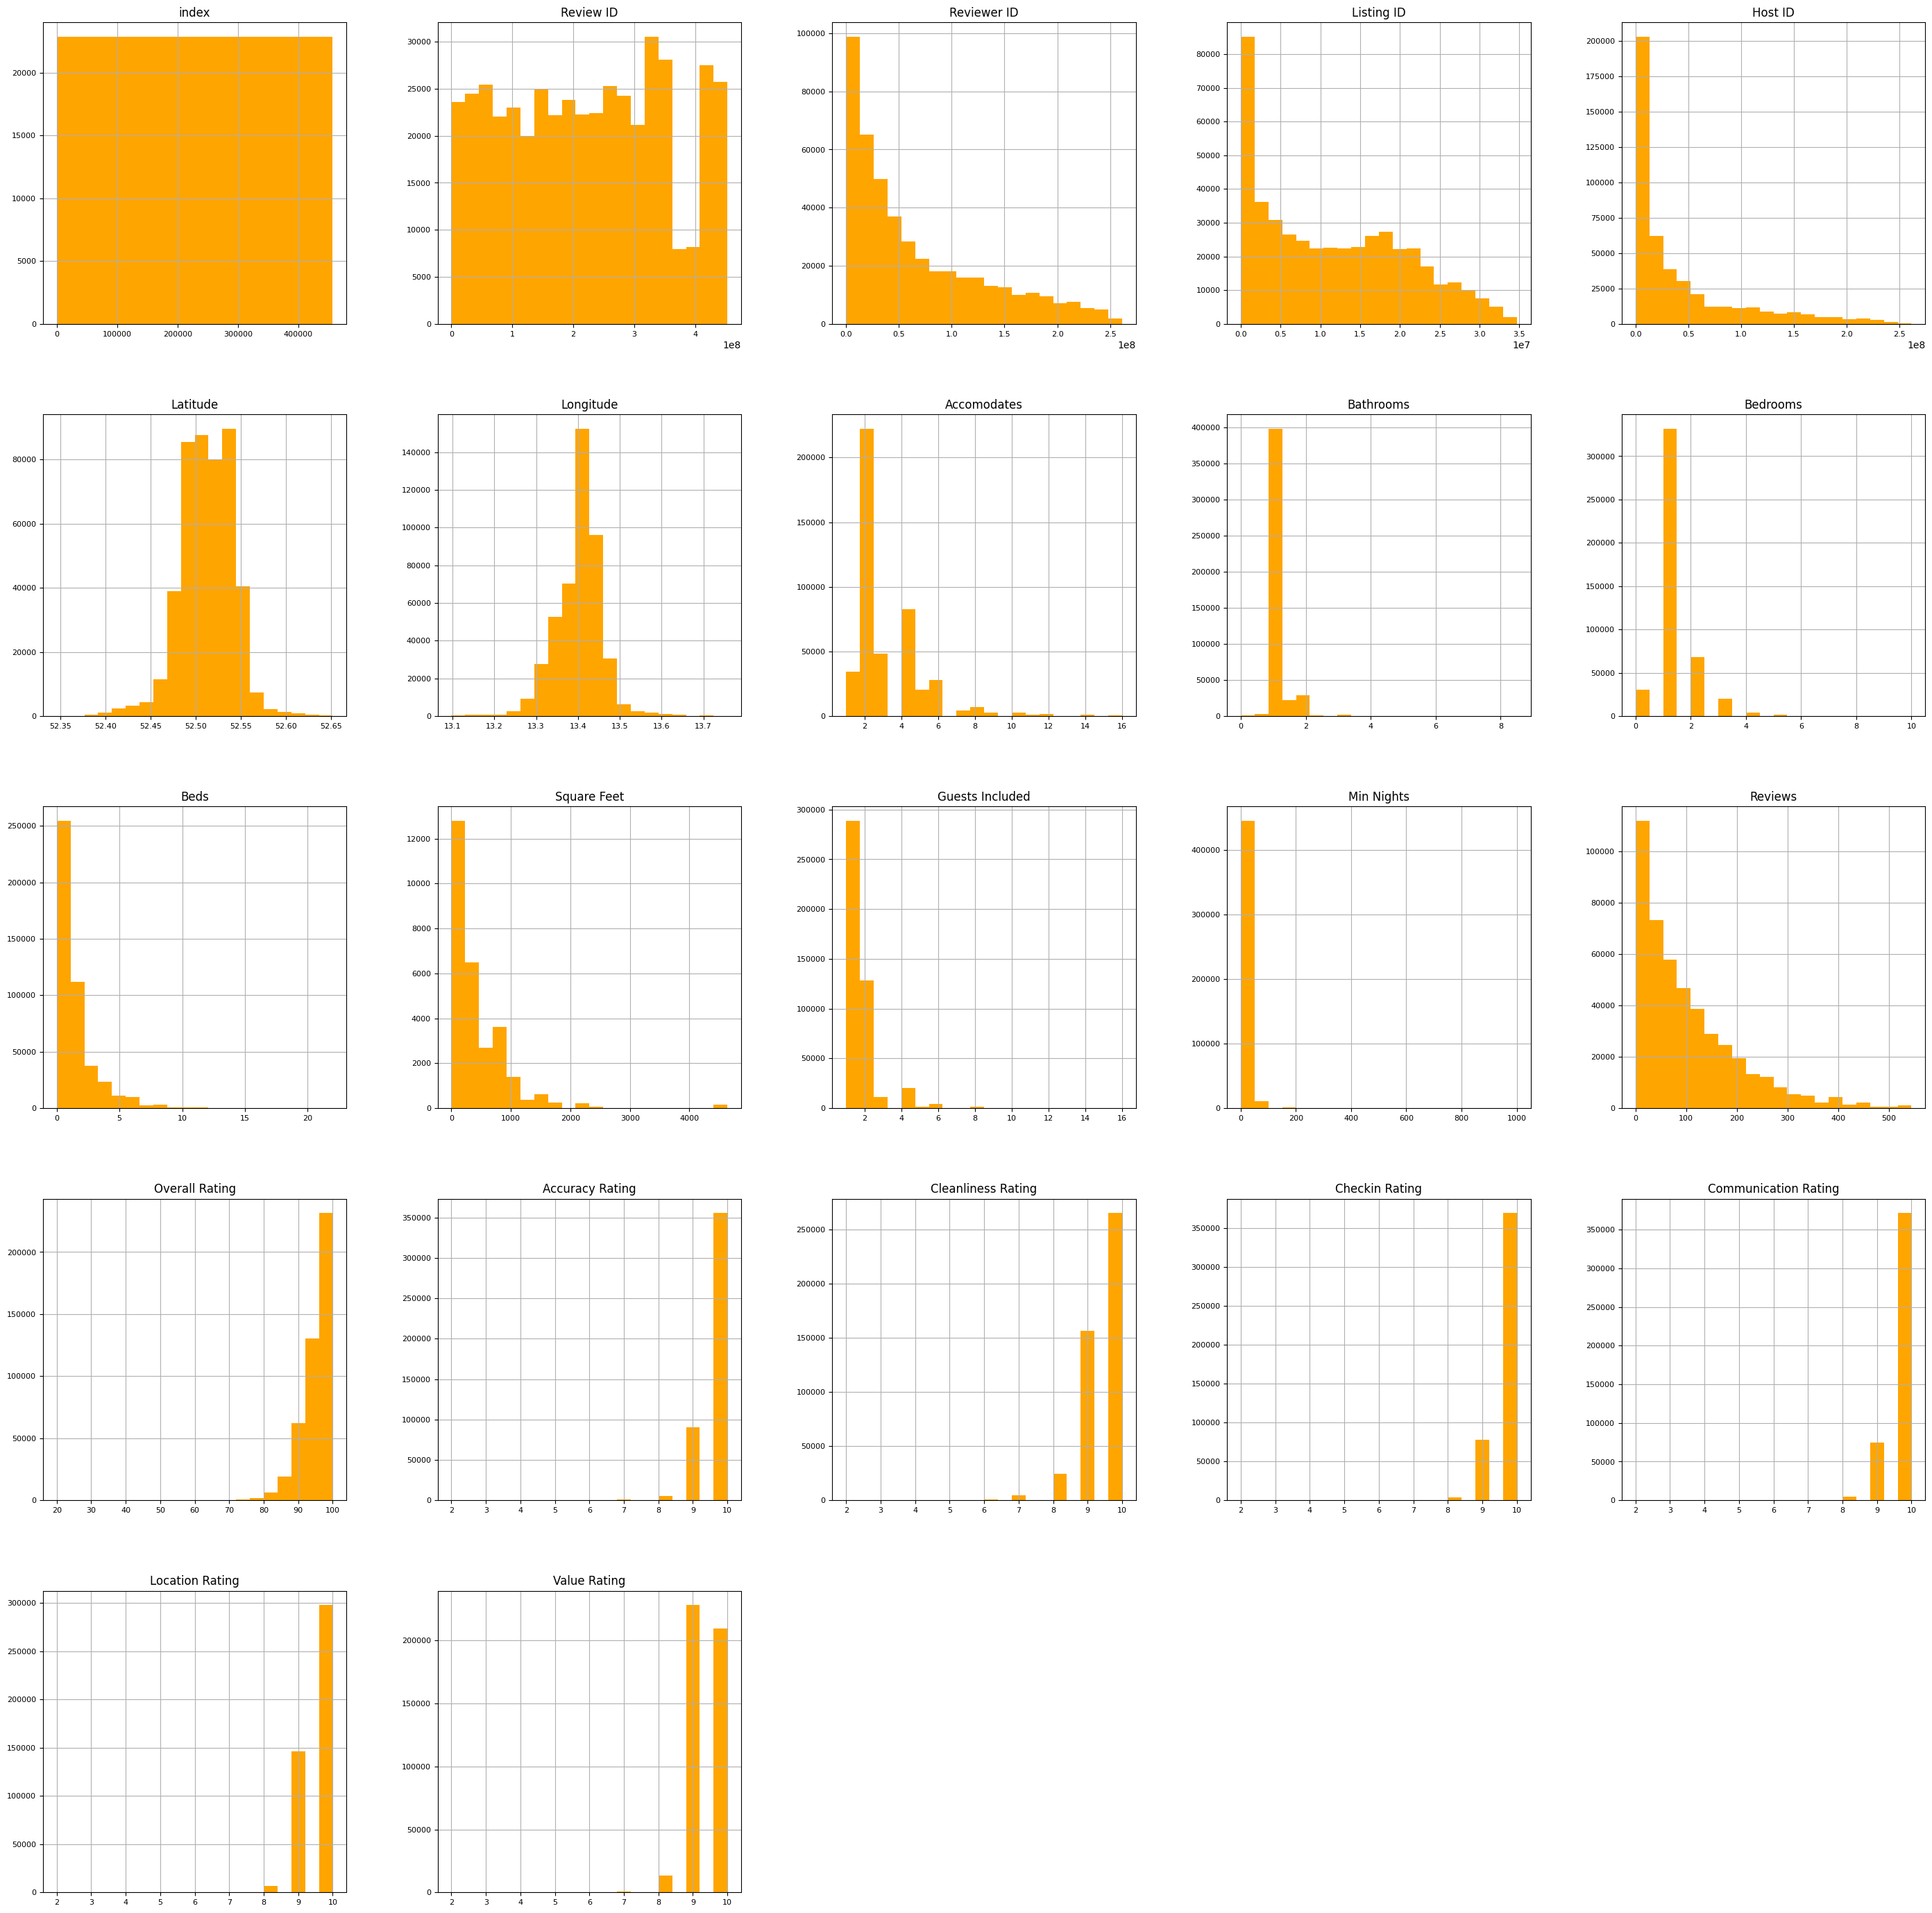

In [6]:
#show hostogram to continus columns
con_df = df[numeric_columns]
con_df.hist(figsize=(35, 35), bins=20, xlabelsize=8, ylabelsize=8, color = "orange");

In [7]:
unique_values = {col: df[col].nunique() for col in object_columns}

# Display the number of unique values for each object column
print("\nNumber of unique values in each object column:")
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count}")


Number of unique values in each object column:
review_date: 3000
Reviewer Name: 57372
Comments: 437539
Listing URL: 23536
Listing Name: 22837
Host URL: 19772
Host Name: 6184
Host Since: 3085
Host Response Time: 4
Host Response Rate: 75
Is Superhost: 2
neighbourhood: 93
Neighborhood Group: 12
City: 59
Postal Code: 396
Country Code: 3
Country: 3
Is Exact Location: 2
Property Type: 35
Room Type: 3
Price: 528
First Review: 2382
Last Review: 1464
Instant Bookable: 2
Business Travel Ready: 1


In [8]:
# Columns to remove because too much unique
columns_to_remove = [
    'review_date', 'Reviewer Name', 'Listing URL', 'Listing Name',
     'Host Name' , 'Review ID' , 'Listing ID' , 'Host URL' , 'Reviewer ID' , 'Host ID'  , 'First Review','Last Review'
    , 'Business Travel Ready'
]

# Remove the specified columns
df_reduce = df.drop(columns=columns_to_remove)


In [9]:
df_reduce.head()

,index,Comments,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,...,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable
0,0,"Very nice, clean appartement! Josh was really ...",09-20-15,NaN,NaN,f,NeukÃÂ¶lln,NeukÃÂ¶lln,Berlin,12047.0,...,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f
1,1,NaN,10/05/2015,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10405.0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,2,Aki is really nice and friendly. We had an ama...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178.0,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
3,3,Aki is a very nice dude with a clean place in ...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178.0,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
4,4,Aki's place was easy to find and located in th...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178.0,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f


C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


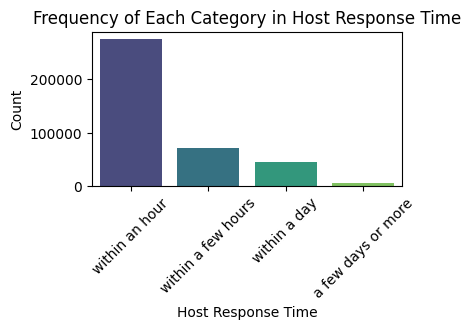

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


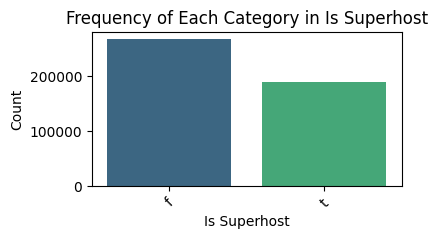

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


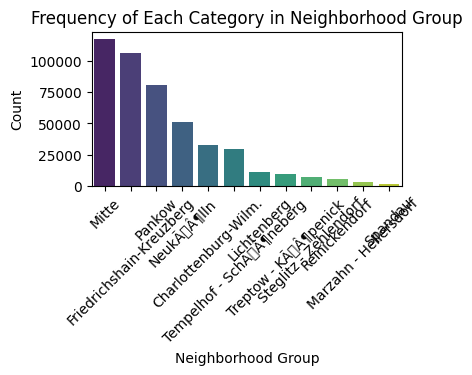

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


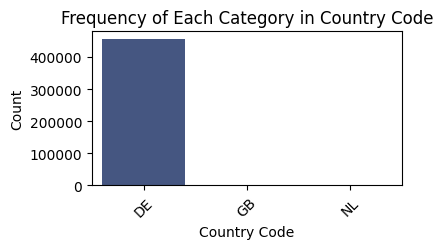

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


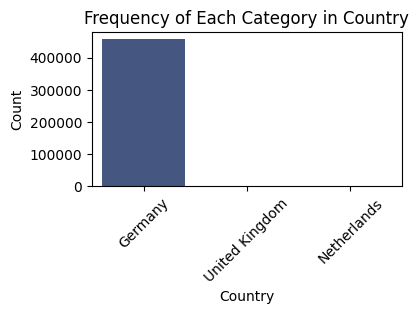

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


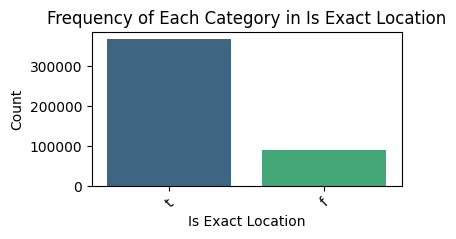

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


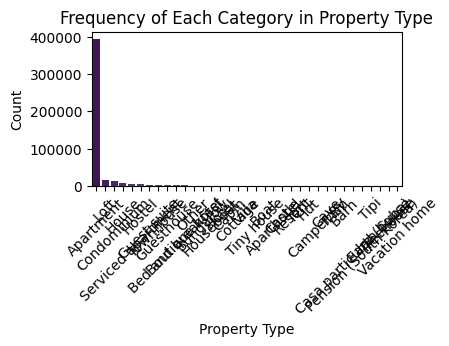

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


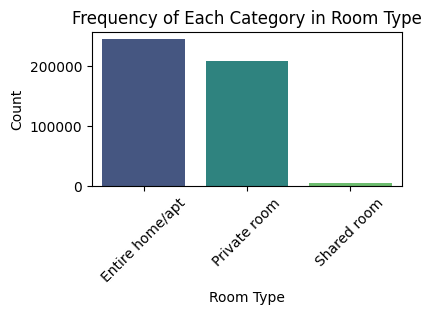

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_17768\3947245159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)


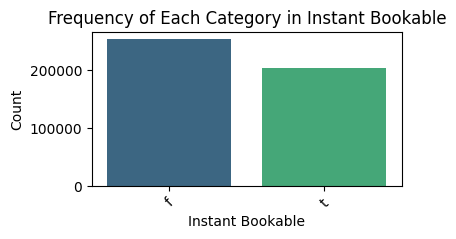

In [10]:
# Maximum number of unique values to display
max_unique_values = 40

# List of categorical columns
categorical_columns = df_reduce.select_dtypes(include='object').columns

# Filter columns to include only those with 40 or fewer unique values
filtered_columns = [col for col in categorical_columns if df_reduce[col].nunique() <= max_unique_values]

# Create separate bar plots for each filtered categorical column
for column in filtered_columns:
    plt.figure(figsize=(4, 2))
    value_counts = df_reduce[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    sns.barplot(x=column, y='Count', data=value_counts, palette='viridis', hue=None)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Frequency of Each Category in {column}')
    plt.xticks(rotation=45)
    plt.show()
    plt.close()  # Close the plot to free up memory

In [19]:
print("Host Response Time value counts:")
print(df_reduce["Host Response Time"].value_counts())
df_reduce = df_reduce.drop(columns="Host Response Time")

Host Response Time value counts:
Host Response Time
within an hour        275309
within a few hours     72144
within a day           44929
a few days or more      5812
Name: count, dtype: int64


In [20]:
print("Country  \n " , df["Country"].value_counts())
df_filtered = df_reduce[~df_reduce['Country'].isin(['United Kingdom', 'Netherlands'])]


Country  
  Country
Germany           456959
United Kingdom         1
Netherlands            1
Name: count, dtype: int64


In [21]:
df_filtered["City"].value_counts()

City
Berlin                                   454246
Berlin (Kreuzberg)                          375
Berlin-Wilmersdorf                          227
Berlin-Mitte                                212
Berlin - Mitte                              177
KÃÂ¶penick                                 171
Berlin, friedrichshain                      165
Prenzlauer Berg                             137
Wannsee                                     120
Friedrichshain                              115
Berlin-Treptow                              111
Kleinmachnow                                 87
Berlin- Charlottenburg                       71
Baseler StraÃÂe 91 A,12205 Berlin          64
Berlin - SchÃÂ¶neberg                       60
Baseler StraÃÂe 91 A, 12205 Berlin         55
Mitte                                        53
.                                            47
10999 Berlin                                 47
Woltersdorf                                  41
Berlin/Steglitz                    

In [22]:
# check if city contain berlin as a substring 
def filter_and_standardize_cities(df, column_name):
    # Standardize the city names to 'Berlin' if they contain 'Berlin'
    df = df.copy()

    # Convert all values to string to avoid errors with non-string types
    df.loc[:, column_name] = df[column_name].astype(str)

    # Standardize the city names to 'Berlin' if they contain 'Berlin'
    df.loc[:, column_name] = df[column_name].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

    # Filter to keep only rows where the city name is now 'Berlin'
    df = df[df[column_name] == 'Berlin']

    return df


# Apply the function to standardize and filter
df_filtered = filter_and_standardize_cities(df_filtered, 'City')

# Print the result
print(df_filtered["City"].value_counts()) # only berlin


City
Berlin    456002
Name: count, dtype: int64


In [23]:
df_filtered[["neighbourhood", "Neighborhood Group"]]

,neighbourhood,Neighborhood Group
0,NeukÃÂ¶lln,NeukÃÂ¶lln
1,Prenzlauer Berg,Pankow
2,Mitte,Mitte
3,Mitte,Mitte
4,Mitte,Mitte
...,...,...
456956,Friedrichshain,Friedrichshain-Kreuzberg
456957,Friedrichshain,Friedrichshain-Kreuzberg
456958,Wedding,Mitte
456959,Wedding,Mitte


In [24]:
#  Replaces the 'neighbourhood' with the 'Neighborhood Group' if it's a substring.

def replace_neighborhood_with_group(df):

  # Ensure both columns are strings
  df['neighbourhood'] = df['neighbourhood'].astype(str)
  df['Neighborhood Group'] = df['Neighborhood Group'].astype(str)

  # Vectorized check and replacement
  df['neighbourhood'] = df.apply(lambda row: row['Neighborhood Group'] if row['neighbourhood'] in row['Neighborhood Group'] else row['neighbourhood'], axis=1)
  return df

# Apply the function to the DataFrame
df_filtered = replace_neighborhood_with_group(df_filtered)
df_filtered[["neighbourhood", "Neighborhood Group"]]

,neighbourhood,Neighborhood Group
0,NeukÃÂ¶lln,NeukÃÂ¶lln
1,Prenzlauer Berg,Pankow
2,Mitte,Mitte
3,Mitte,Mitte
4,Mitte,Mitte
...,...,...
456956,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg
456957,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg
456958,Wedding,Mitte
456959,Wedding,Mitte


In [25]:
df_encoded = df_filtered.copy()
# Create LabelEncoder objects for each column
le_neighbourhood = LabelEncoder()
le_neighborhood_group = LabelEncoder()

# Fit and transform the columns
df_encoded['neighbourhood'] = le_neighbourhood.fit_transform(df_encoded['neighbourhood'])
df_encoded['Neighborhood Group'] = le_neighborhood_group.fit_transform(df_encoded['Neighborhood Group'])

# Calculate correlation
correlation_matrix = df_encoded[["neighbourhood", "Neighborhood Group"]].corr()
print(correlation_matrix)

                    neighbourhood  Neighborhood Group
neighbourhood            1.000000            0.560351
Neighborhood Group       0.560351            1.000000


In [26]:
# Remove the specified columns
df_filtered = df_filtered.drop(columns="Neighborhood Group")

In [27]:
df_filtered.head()

,index,Comments,Host Since,Host Response Rate,Is Superhost,neighbourhood,City,Postal Code,Country Code,Country,...,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable
0,0,"Very nice, clean appartement! Josh was really ...",09-20-15,NaN,f,NeukÃÂ¶lln,Berlin,12047.0,DE,Germany,...,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f
1,1,NaN,10/05/2015,NaN,f,Prenzlauer Berg,Berlin,10405.0,DE,Germany,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,2,Aki is really nice and friendly. We had an ama...,08/07/2015,100%,f,Mitte,Berlin,10178.0,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
3,3,Aki is a very nice dude with a clean place in ...,08/07/2015,100%,f,Mitte,Berlin,10178.0,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
4,4,Aki's place was easy to find and located in th...,08/07/2015,100%,f,Mitte,Berlin,10178.0,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f


In [28]:
# change "Host Since" colunm to calc how many years from today date diffrention

df_filtered["Host Since"].value_counts()
# Define the function to parse dates
def parse_date(date_str):
    for fmt in ('%m-%d-%y', '%m-%d-%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to the 'Host Since' column
df_filtered['Host Since'] = df_filtered['Host Since'].apply(parse_date)

# Get today's date
today = pd.to_datetime(datetime.now().date())

# Calculate the number of years from today to each date
def calculate_years_from_today(date):
    if pd.isna(date):
        return None
    delta = today - date
    years = delta.days / 365  # Average year length accounting for leap years
    return years

df_filtered['Years From Today'] = df_filtered['Host Since'].apply(calculate_years_from_today)

print(df_filtered['Host Since'] , df_filtered['Years From Today'])
df_filtered.drop(columns=['Host Since'], inplace=True)


0        2015-09-20
1        2015-10-05
2        2015-08-07
3        2015-08-07
4        2015-08-07
            ...    
456956   2013-03-17
456957   2013-03-17
456958   2015-12-14
456959   2015-12-14
456960   2015-12-14
Name: Host Since, Length: 456002, dtype: datetime64[ns] 0          8.873973
1          8.832877
2          8.994521
3          8.994521
4          8.994521
            ...    
456956    11.386301
456957    11.386301
456958     8.641096
456959     8.641096
456960     8.641096
Name: Years From Today, Length: 456002, dtype: float64


In [29]:
!pip install re
import re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [84]:
# remove chars from all dataframe that not letters or numbers like "-)(*&^%$#@!|"

def remove_non_alphanumeric(text):
    if isinstance(text, str):  # Check if the text is a string
        # Use regex to keep letters, numbers, hyphens, and spaces
        return re.sub(r'[^a-zA-Z0-9- ]', '', text)
    return text  # Return non-string values unchanged



# Apply the function to all elements in the DataFrame
df_cleaned = df_filtered.apply(lambda col: col.map(remove_non_alphanumeric))


In [85]:
df_cleaned.head()

,index,Comments,Host Response Rate,Is Superhost,neighbourhood,City,Postal Code,Country Code,Country,Latitude,...,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today
0,0,Very nice clean appartement Josh was really gr...,NaN,f,Neuklln,Berlin,12047.0,DE,Germany,52.49234,...,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,8.873973
1,1,NaN,NaN,f,Prenzlauer Berg,Berlin,10405.0,DE,Germany,52.53292,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,8.832877
2,2,Aki is really nice and friendly We had an amaz...,100,f,Mitte,Berlin,10178.0,DE,Germany,52.52134,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521
3,3,Aki is a very nice dude with a clean place in ...,100,f,Mitte,Berlin,10178.0,DE,Germany,52.52134,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521
4,4,Akis place was easy to find and located in the...,100,f,Mitte,Berlin,10178.0,DE,Germany,52.52134,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521


In [86]:
# Get categorical columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns
# Count unique values for each categorical column
unique_counts = {column: df_cleaned[column].nunique() for column in categorical_columns}
unique_counts

{'Comments': 429620,
 'Host Response Rate': 75,
 'Is Superhost': 2,
 'neighbourhood': 91,
 'City': 1,
 'Postal Code': 387,
 'Country Code': 1,
 'Country': 1,
 'Is Exact Location': 2,
 'Property Type': 35,
 'Room Type': 3,
 'Price': 523,
 'Instant Bookable': 2}

In [87]:
df_cleaned["Host Response Rate"].value_counts().head()

Host Response Rate
100    311862
90      17004
80       7571
99       5495
95       4351
Name: count, dtype: int64

In [88]:
# convert object Postal Code , price and Host Response Rate columns to int
df_cleaned["Price"] = df_cleaned['Price'].astype(int)
df_cleaned["Host Response Rate"] = pd.to_numeric(df_cleaned["Host Response Rate"], errors='coerce')
df_cleaned["Postal Code"] = pd.to_numeric(df_cleaned["Postal Code"], errors='coerce')
# drop city and country , Country Code too unique - equal to 1
df_cleaned.drop(columns=['City', 'Country','Country Code'], inplace=True)
# drop comment colums too unique and contain too many words
df_cleaned.drop(columns=['Comments'], inplace=True)


In [89]:
print(df_cleaned['Room Type'].value_counts())
print(df_cleaned['Instant Bookable'].value_counts())

Room Type
Entire homeapt    244078
Private room      206885
Shared room         5039
Name: count, dtype: int64
Instant Bookable
f    252993
t    203009
Name: count, dtype: int64


In [90]:
# check how much apartment in the exact location - real location
print(df_cleaned['Is Exact Location'].value_counts())
# remove false values
df_cleaned = df_cleaned [df_cleaned['Is Exact Location'] == 't' ].copy()
df_cleaned.drop(columns=['Is Exact Location'], inplace=True)

Is Exact Location
t    365779
f     90223
Name: count, dtype: int64


In [91]:
# Frequency count of each property type
value_counts = df_cleaned['Property Type'].value_counts()
print(value_counts)
# Define a threshold for "Other"
threshold = 1000  # Change this value based on your needs
# Create a mapping for property types to "Other" if they are below the threshold
mapping = {k: 'Other' if v < threshold else k for k, v in value_counts.items()}
# Replace values in the DataFrame
df_cleaned['Property Type'] = df_cleaned['Property Type'].map(mapping)
# Display the resulting DataFrame
print("\n add other \n ", df_cleaned['Property Type'].value_counts())


# Frequency count of each neighbourhood
value_counts = df_cleaned['neighbourhood'].value_counts()
print(value_counts)
# Define a threshold for "Other"
threshold = 2000  # Change this value based on your needs
# Create a mapping for property types to "Other" if they are below the threshold
mapping = {k: 'Other' if v < threshold else k for k, v in value_counts.items()}
# Replace values in the DataFrame
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].map(mapping)
# Display the resulting DataFrame
print("\n add other \n ", df_cleaned['neighbourhood'].value_counts())


Property Type
Apartment               314376
Loft                     14438
Condominium              11748
House                     6361
Hostel                    4140
Guest suite               2905
Serviced apartment        2597
Townhouse                 1937
Guesthouse                1694
Bed and breakfast         1607
Boutique hotel            1311
Other                      544
Bungalow                   452
Houseboat                  337
Hotel                      293
Villa                      289
Cottage                    227
Cabin                      119
Tiny house                  77
Boat                        67
Aparthotel                  55
Castle                      49
Resort                      43
Hut                         29
CamperRV                    24
Cave                        23
Train                       21
Casa particular Cuba         9
Tipi                         3
Earth house                  3
Treehouse                    1
Name: count, dtype: int64

In [92]:
df_cleaned.head()

,index,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Latitude,Longitude,Property Type,Room Type,Accomodates,...,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today
0,0,NaN,f,Neuklln,12047.0,52.49234,13.42994,Apartment,Entire homeapt,4,...,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,8.873973
2,2,100.0,f,Mitte,10178.0,52.52134,13.41866,Apartment,Private room,2,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521
3,3,100.0,f,Mitte,10178.0,52.52134,13.41866,Apartment,Private room,2,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521
4,4,100.0,f,Mitte,10178.0,52.52134,13.41866,Apartment,Private room,2,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521
5,5,100.0,f,Mitte,10178.0,52.52134,13.41866,Apartment,Private room,2,...,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,8.994521


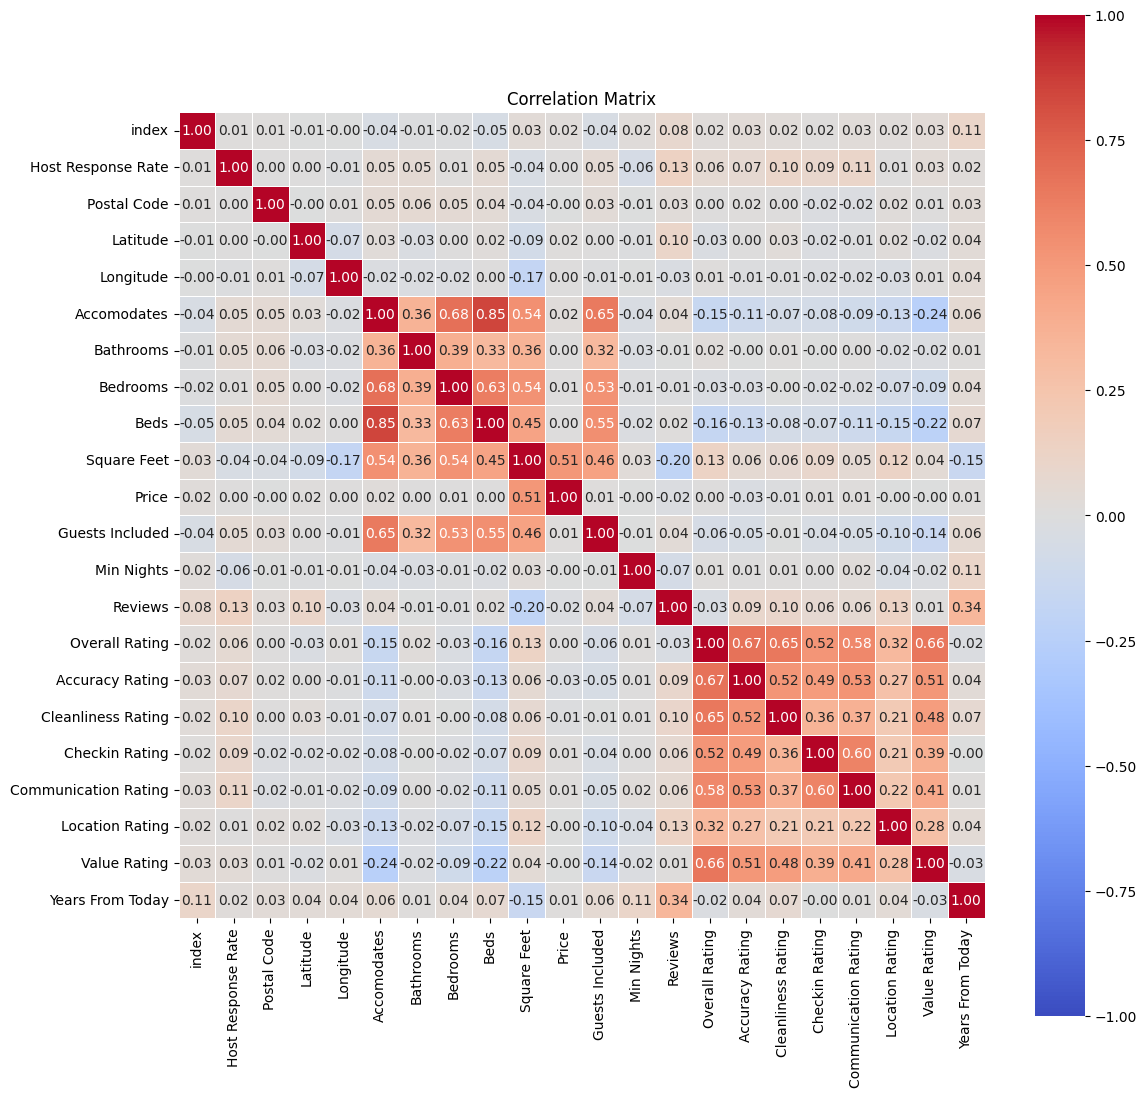

In [93]:
newnumeric_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# Compute correlation matrix
corr_matrix = df_cleaned[newnumeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [94]:
# a threshold for high correlation
threshold = 0.75

# Find pairs of columns with high correlation
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns 
                   for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# Remove duplicate pairs (e.g., (A, B) and (B, A))
high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# Display the pairs
print("Highly Correlated Columns (correlation > {}):".format(threshold))
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Columns (correlation > 0.75):
('Accomodates', 'Beds')


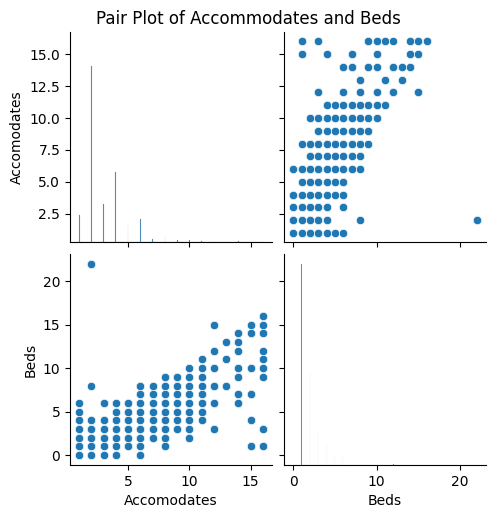

In [95]:
df_cleaned[["Accomodates","Beds"]]

sns.pairplot(df_cleaned[["Accomodates","Beds"]])
plt.suptitle('Pair Plot of Accommodates and Beds', y=1.02)
plt.show()

In [96]:
# check the columns in the clean df to explore or remove columns
df_cleaned.columns

Index(['index', 'Host Response Rate', 'Is Superhost', 'neighbourhood',
       'Postal Code', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'Overall Rating',
       'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
       'Communication Rating', 'Location Rating', 'Value Rating',
       'Instant Bookable', 'Years From Today'],
      dtype='object')

In [97]:
# save the geographical data seperate
dfgeodata = df_cleaned[['index','Latitude', 'Longitude']] 
dfgeodata.sample(5)

,index,Latitude,Longitude
232787,232787,52.59338,13.41994


In [98]:
df_cleaned = df_cleaned.drop(['Latitude', 'Longitude'], axis=1)

count    365779.000000
mean        201.667723
std        6056.391880
min           0.000000
25%          38.000000
50%          55.000000
75%          84.000000
max      900000.000000
Name: Price, dtype: float64


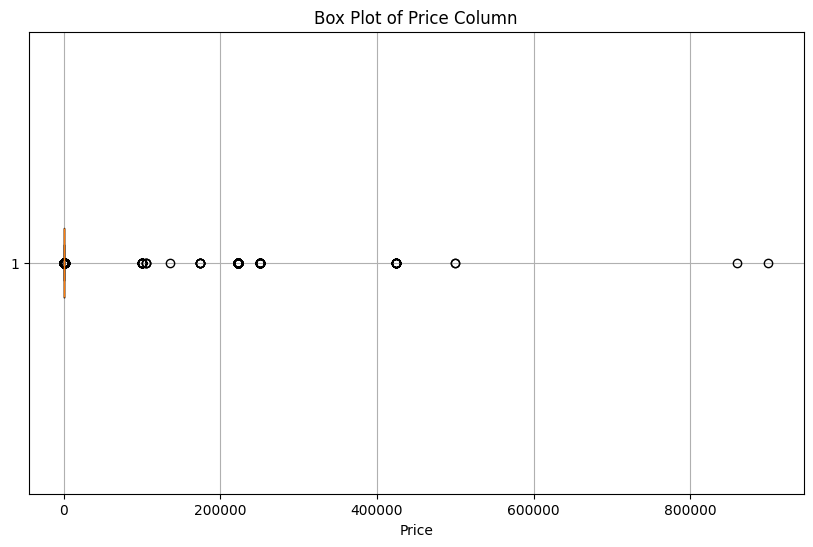

In [99]:
# show plot of price target 
print(df_cleaned['Price'].describe())
# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['Price'], vert=False)
plt.title('Box Plot of Price Column')
plt.xlabel('Price')
plt.grid(True)
plt.show()